In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

df=pd.read_csv(io.BytesIO(uploaded['city_day.csv']))

Saving city_day.csv to city_day.csv


In [ ]:
df=df.dropna()
print(df)

                City        Date  PM2.5    PM10    NO    NO2    NOx    NH3  \
2123       Amaravati  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72   
2124       Amaravati  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28   
2125       Amaravati  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91   
2126       Amaravati  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42   
2127       Amaravati  2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25   
...              ...         ...    ...     ...   ...    ...    ...    ...   
29525  Visakhapatnam  2020-06-26   7.63   32.27  5.91  23.27  17.19  11.15   
29526  Visakhapatnam  2020-06-27  15.02   50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38   74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91   65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64   49.97  4.05  29.26  18.80  10.03   

         CO    SO2      O3  Benzene  Toluene  Xylene    AQI    

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['AQI_Bucket']=le.fit_transform(df['AQI_Bucket'])
print(df['AQI_Bucket'].value_counts() )

1    2521
3    2079
2     648
0     454
5     410
4     124
Name: AQI_Bucket, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x=df.iloc[:,2:14]
y=df["AQI_Bucket"]
x,y

(       PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  Benzene  \
 2123   81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09     0.20   
 2124   78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44     0.22   
 2125   88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81     0.29   
 2126   64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18     0.17   
 2127   72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74     0.21   
 ...      ...     ...   ...    ...    ...    ...   ...    ...     ...      ...   
 29525   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87   19.90     1.45   
 29526  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55   23.30     2.24   
 29527  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72   30.14     0.74   
 29528  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42   30.96     0.01   
 29529  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84   28.30     0.00   
 
        Toluen

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.8)
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape) 

(1247, 12) (4989, 12) (1247,) (4989,)


In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression() 

In [ ]:
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_pred=mlr.predict(x_test) 

print(y_pred[:5],y_test.values[:5] )

[1.74839761 1.64013322 1.90306688 2.35022822 1.79697298] [3 3 1 2 3]


In [ ]:

print(mlr.score(x_test,y_test))

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 
print("Mean Absolute Error:- ",mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:- ",mean_squared_error(y_test,y_pred)) 
print("r2_score:- ",r2_score(y_test,y_pred)) 

0.18946593484141327
Mean Absolute Error:-  1.0708636884898894
Mean Squared Error:-  1.384272714993072
r2_score:-  0.18946593484141327


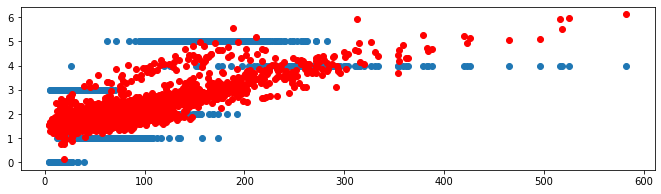

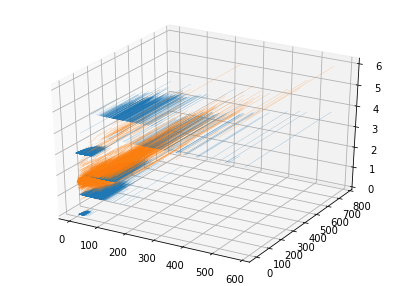

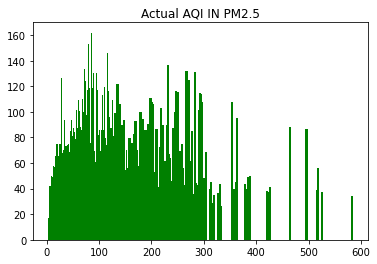

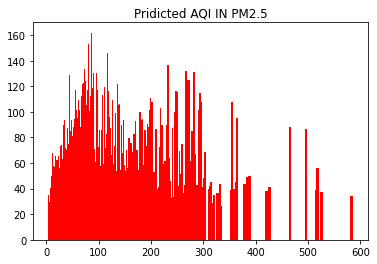

In [ ]:

plt.figure(figsize=(25,3)) 
plt.subplot(1,2,1) 

plt.scatter(x_test['PM2.5'],y_test) 

plt.scatter(x_test['PM2.5'],y_pred, color='red')

plt.show() 

plt.figure(figsize=(7,5)) 

plt.subplot(1,2,2)

ax=plt.axes (projection='3d') 

ax.bar(x_test['PM2.5'],x_test['PM10'],y_test) 

ax.bar(x_test['PM2.5'],x_test['PM10'],y_pred)

plt.show() 
plt.title("Actual AQI IN PM2.5")
plt.bar(x_test['PM2.5'],x_test['O3'],y_test,color='g') 

plt.show()
plt.title("Pridicted AQI IN PM2.5")
plt.bar(x_test['PM2.5'],x_test['O3'],y_pred,color='r') 

plt.show()


DecisionTreeRegressor()
[3. 3. 1. 2. 3.]
[3 3 1 2 3]
------accuracy score--------
mean_absolute_error:- 0.5558228101824013
mean_squared_error:- 1.3223090799759472
r2_score 0.22574754065395342
MODEL SCORE 0.22574754065395342
1.149916988297828


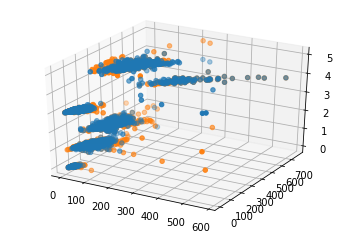

In [ ]:
 
from sklearn.tree import DecisionTreeRegressor 
dtr=DecisionTreeRegressor() 

print(dtr. fit(x_train, y_train))

y_pred_dtr=dtr.predict(x_test) 

print(y_pred_dtr[:5]) 
print(y_test.values[:5]) 

print('------accuracy score--------') 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 
from math import sqrt 

print('mean_absolute_error:-',mean_absolute_error(y_test,y_pred_dtr)) 
print('mean_squared_error:-', mean_squared_error(y_test,y_pred_dtr)) 

mse=mean_squared_error(y_test,y_pred_dtr) 

print('r2_score',r2_score(y_test,y_pred_dtr)) 
print('MODEL SCORE', dtr.score(x_test,y_test)) 

print(sqrt(mse)) 

ax = plt.axes (projection ='3d') 
ax.scatter3D(x_test['PM2.5'],x_test['PM10'],y_test) 
ax.scatter3D(x_test['PM2.5'],x_test['PM10'],y_pred_dtr, 'red') 
plt.show() 



[2.51016458 2.51016458 1.26229664 2.06206346 2.51016458] [3 3 1 2 3]
------accuracy score--------
mean_absolute_error 0.7114287654731594
mean_squared_error 0.8692705832775914
r2_score 0.4910154538513113
MODEL SCORE 0.4910154538513113
0.9323468149125579


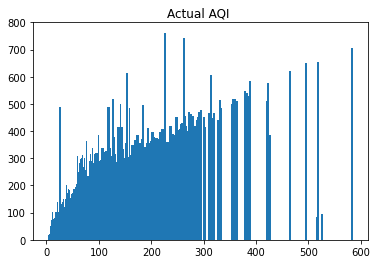

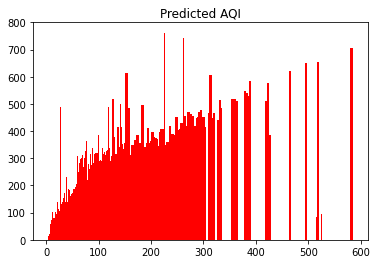

In [ ]:

from sklearn.ensemble import RandomForestRegressor 

rfr=RandomForestRegressor(n_estimators=5, max_depth=3) 

rfr.fit(x_train, y_train) 
y_pred_rfr=rfr.predict(x_test) 
print(y_pred_rfr[:5],y_test.values[:5]) 

print('------accuracy score--------') 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from math import sqrt 
print('mean_absolute_error', mean_absolute_error(y_test,y_pred_rfr)) 

print('mean_squared_error', mean_squared_error(y_test,y_pred_rfr)) 

mse=mean_squared_error(y_test,y_pred_rfr) 

print('r2_score',r2_score(y_test,y_pred_rfr))
print('MODEL SCORE',rfr.score(x_test, y_test)) 
print(sqrt(mse)) 
#ax = plt.axes (projection ='3d')
plt.title("Actual AQI ")
plt.bar(x_test['PM2.5'],x_test['PM10'],y_test) 
plt.show()
plt.title("Predicted AQI")
plt.bar(x_test['PM2.5'],x_test['PM10'],y_pred_rfr,color='r') 

plt.show() 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 

knn=KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train, y_train) 

y_pred_knn=knn.predict(x_test) 

print(y_pred_knn[:5],y_test.values[:5]) 

print('------accuracy score--------') 

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 
from math import sqrt 

print('mean_absolute_error', mean_absolute_error(y_test,y_pred_knn)) 

print('mean_squared_error', mean_squared_error(y_test,y_pred_knn)) 
print('r2_score',r2_score(y_test, y_pred_knn)) 
print('MODEL SCORE', knn.score(x_test,y_test)) 

[3.  3.  1.8 1.4 2.6] [3 3 1 2 3]
------accuracy score--------
mean_absolute_error 0.5708558829424735
mean_squared_error 0.7983644016837042
r2_score 0.5325331945318057
MODEL SCORE 0.5325331945318057


0.1961930096682737
0.18946593484141327
Mean Absolute Error:-  1.0708636884898894
Mean Squared Error:-  1.384272714993072
r2_score:-  0.18946593484141327


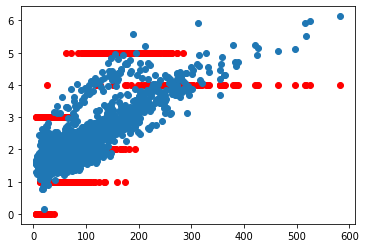

In [ ]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()

slr.fit(x_train, y_train)
y_pred=slr.predict(x_test)

print(slr.score(x_train,y_train))
print(slr.score(x_test,y_test))

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 

print("Mean Absolute Error:- ",mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:- ",mean_squared_error(y_test,y_pred)) 
print("r2_score:- ",r2_score(y_test,y_pred)) 

a=slr.coef_
b=slr.intercept_


plt.scatter(x_test['PM2.5'],y_test,color='r')
plt.scatter(x_test['PM2.5'],y_pred)

plt.show() 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns